<a href="https://colab.research.google.com/github/Jahnavi0507/lift-off/blob/main/LIFTOFF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
import pandas as pd
train=pd.read_csv('train.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:

import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [9]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
import pandas as pd
test=pd.read_csv('test.csv')

In [12]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [14]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [16]:
test_missing_values=test.isnull().sum()
test_missing_values=test_missing_values[test_missing_values>0]
print(test_missing_values)

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [18]:
fill_values = {}
missing_values= train.isnull().sum()
missing_values=missing_values[missing_values>0]
print(missing_values)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [19]:
train = train.fillna(fill_values)
test = test.fillna(fill_values)

In [20]:
print(train.isnull().sum())
print(test.isnull().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64


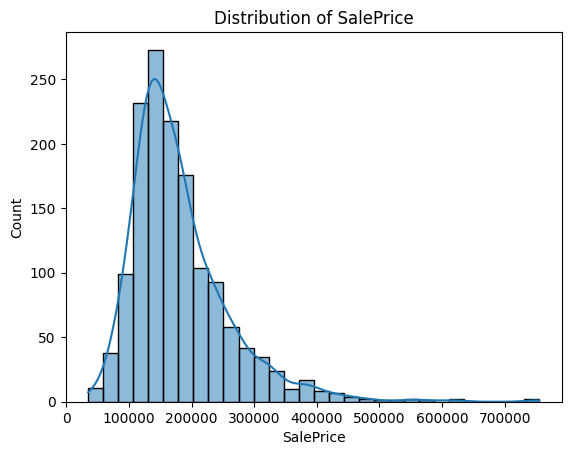

In [23]:
sns.histplot(train['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.show()

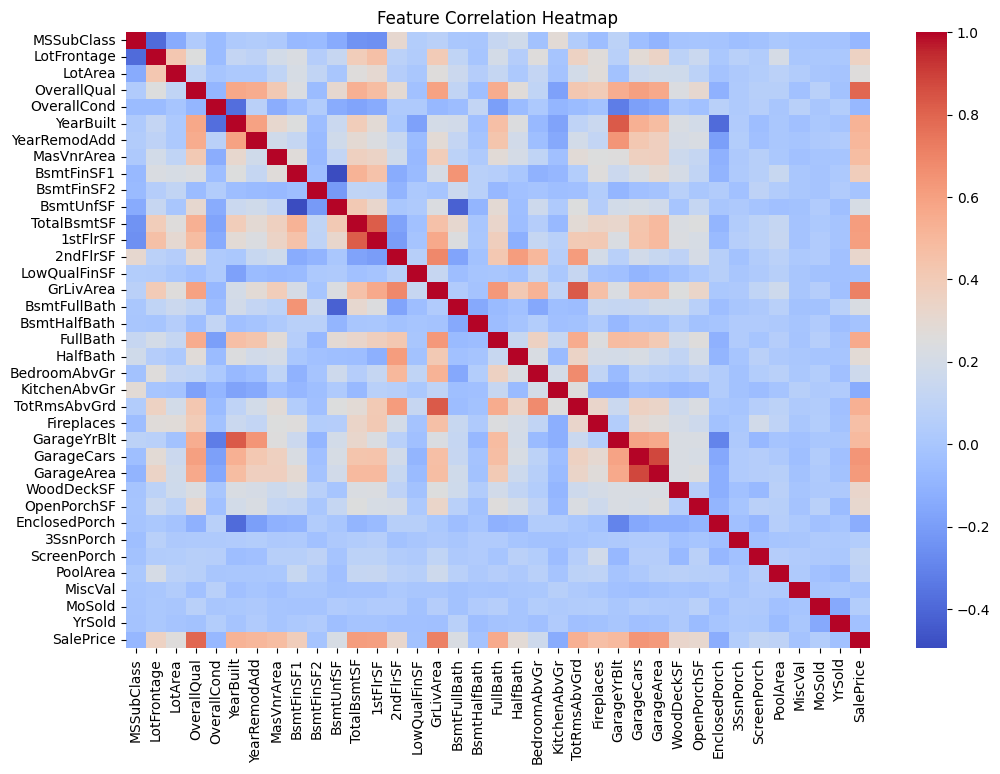

In [24]:
numeric_cols = train.select_dtypes(include=['number'])
correlation = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=False, cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

In [25]:
y_train = train['SalePrice']

train = train.select_dtypes(include=[np.number])
test = test.select_dtypes(include=[np.number])

In [26]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [27]:
X_train = train.drop(columns=['SalePrice'])
X_train, X_test = X_train.align(test, join='inner', axis=1)

In [28]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (1460, 36)
y_train shape: (1460,)
X_test shape: (1459, 36)


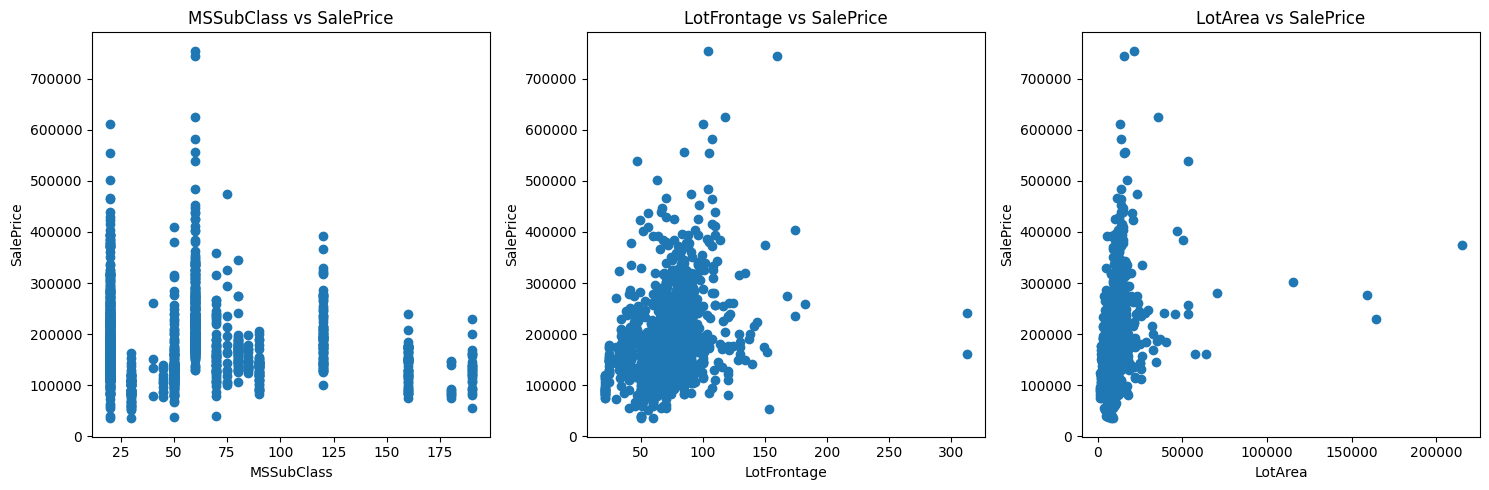

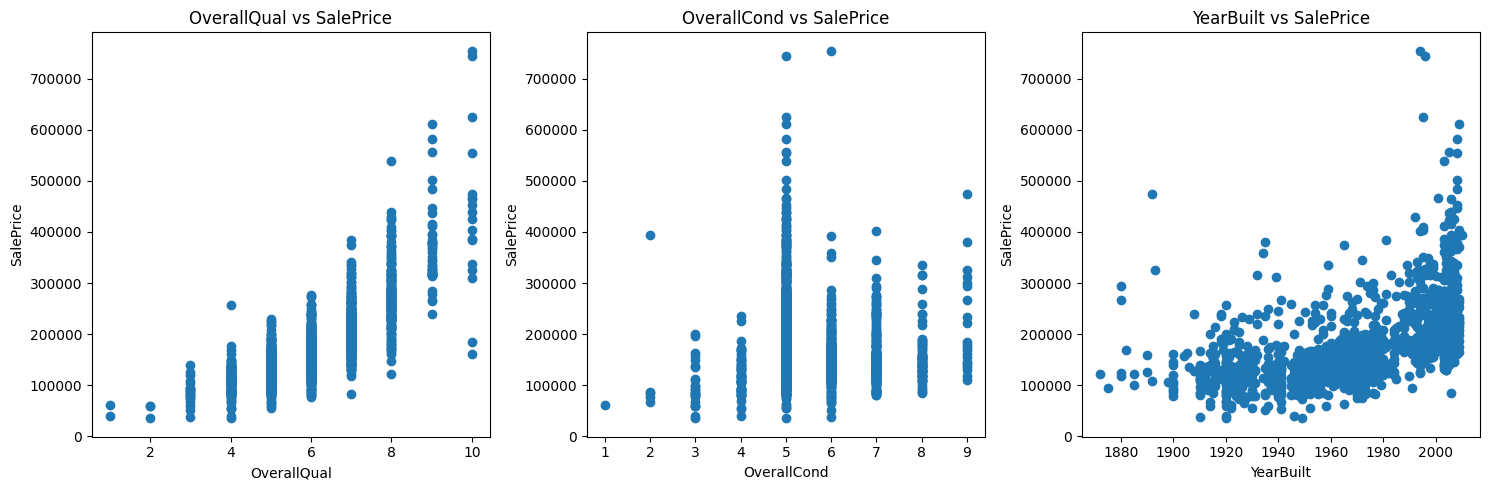

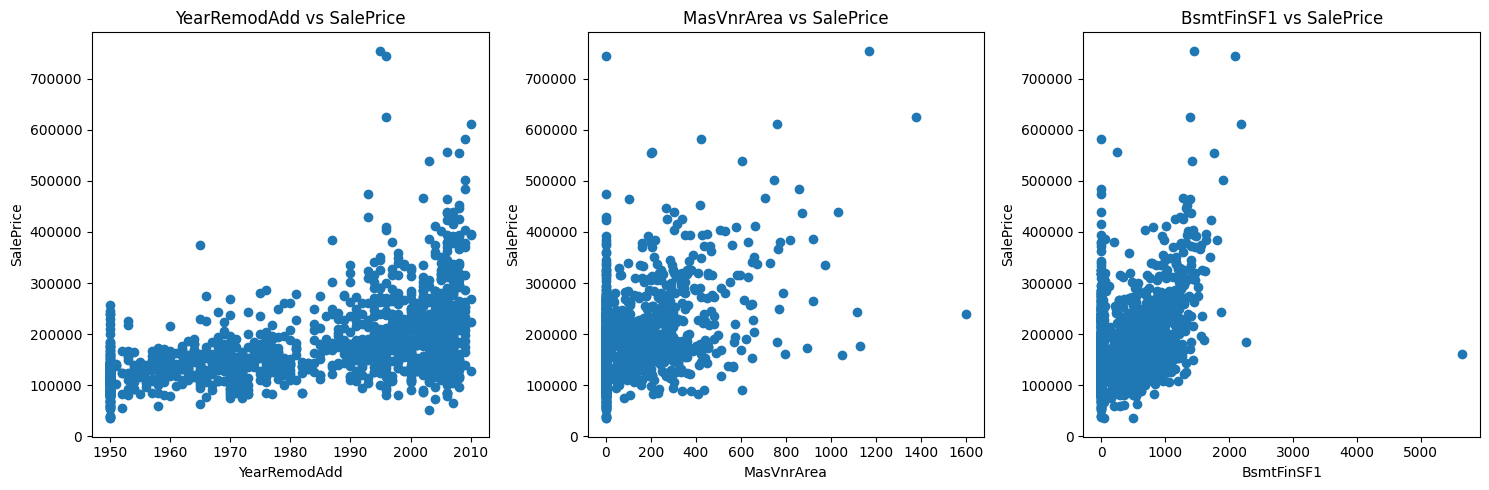

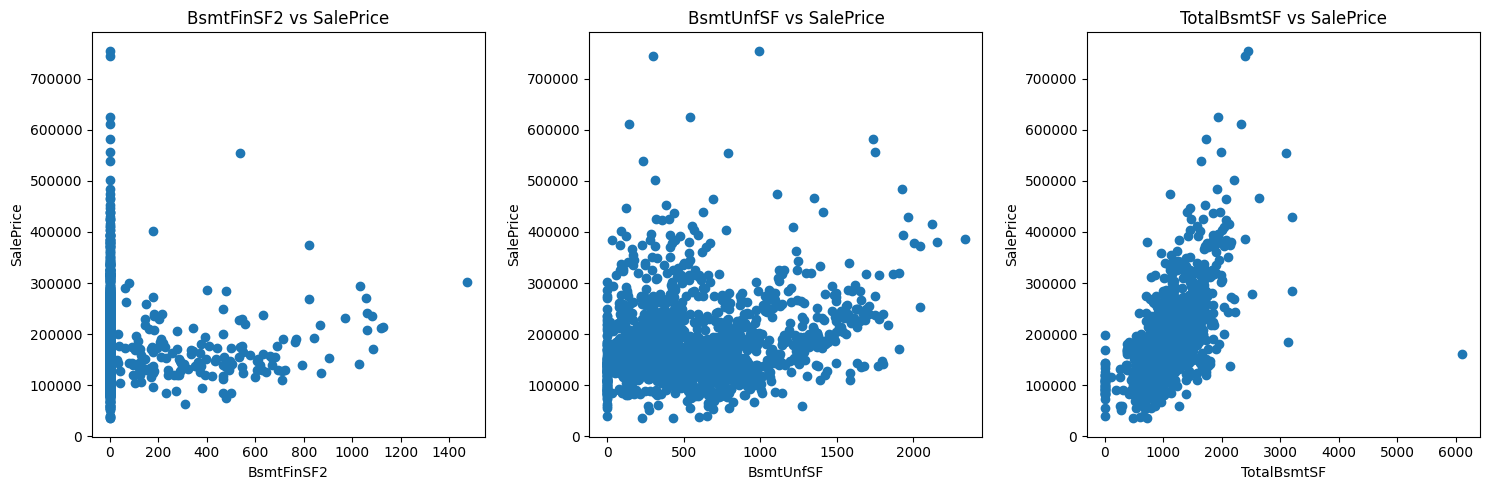

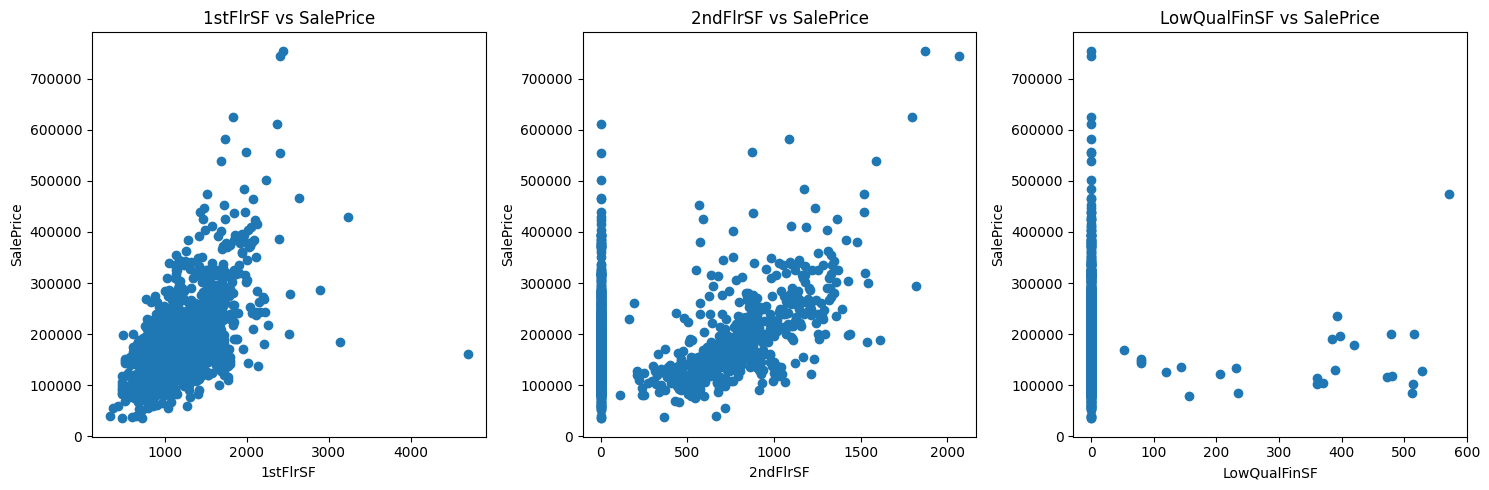

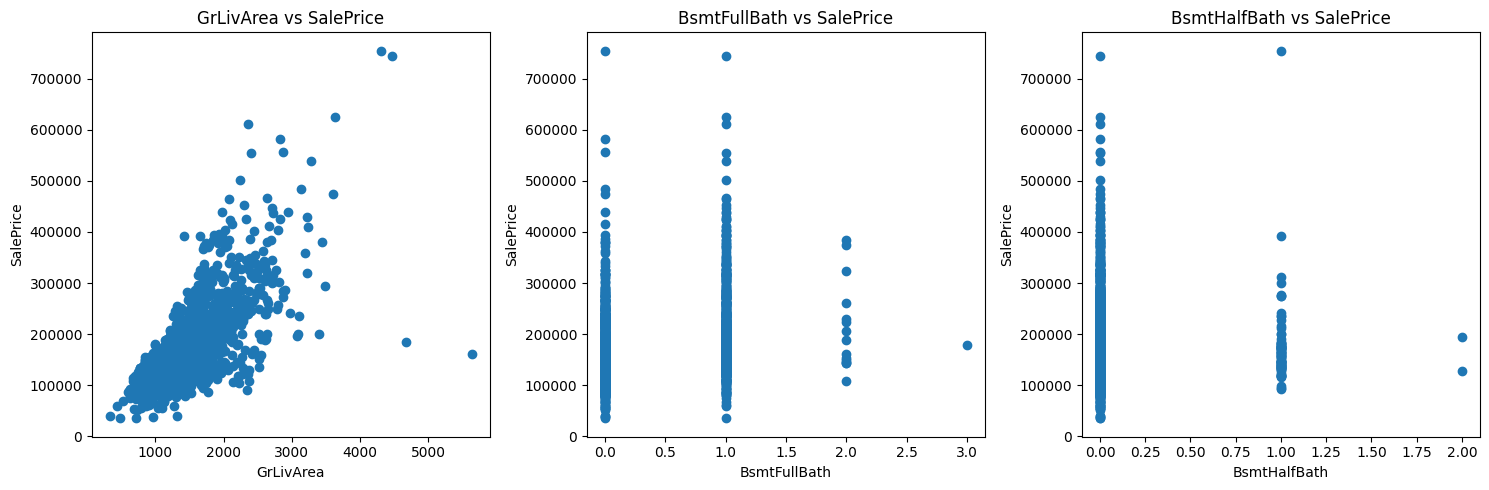

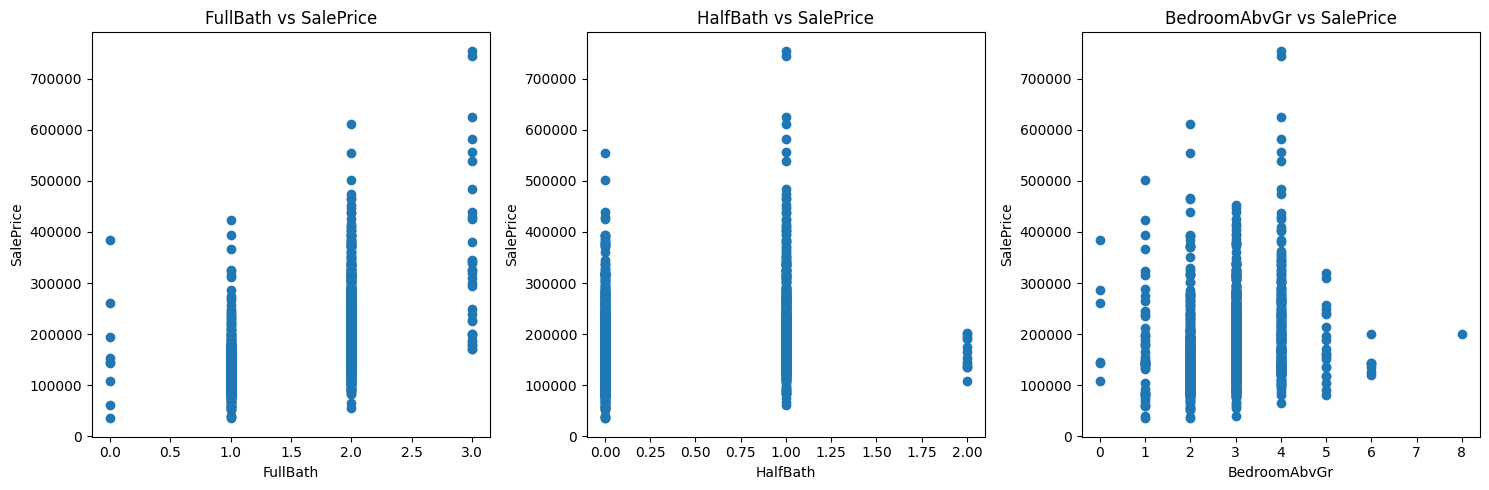

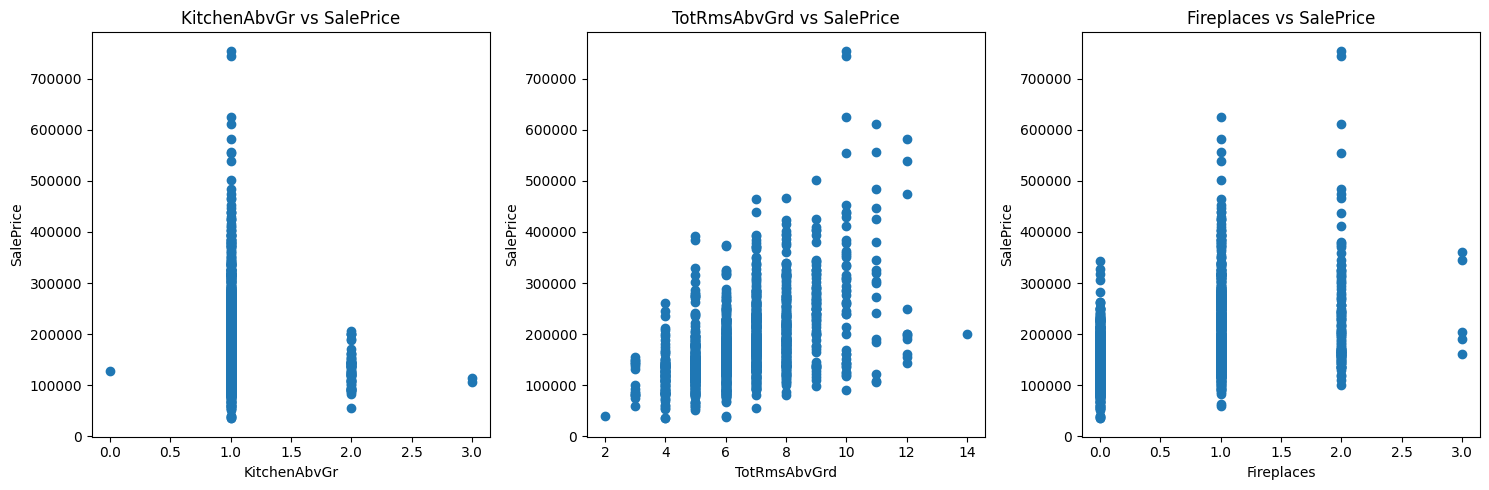

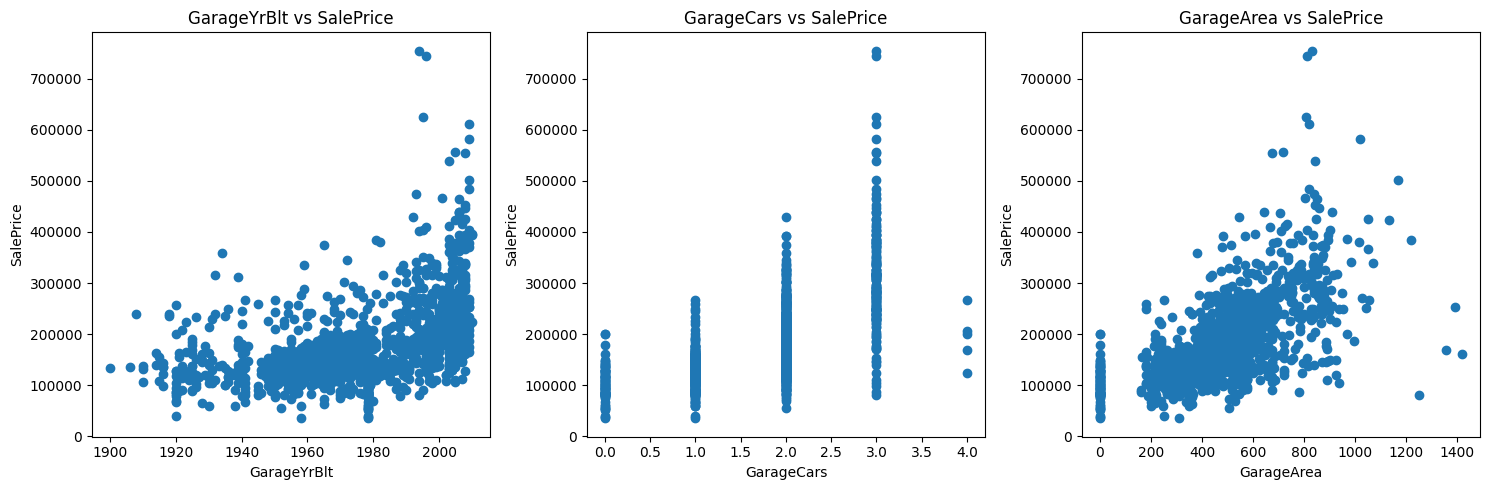

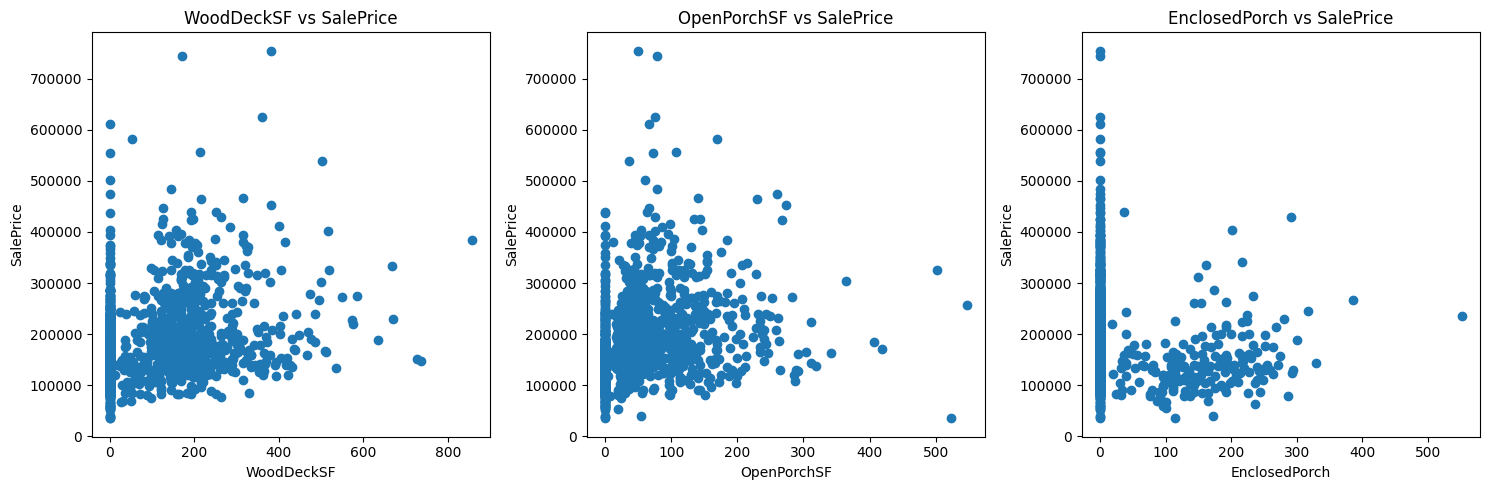

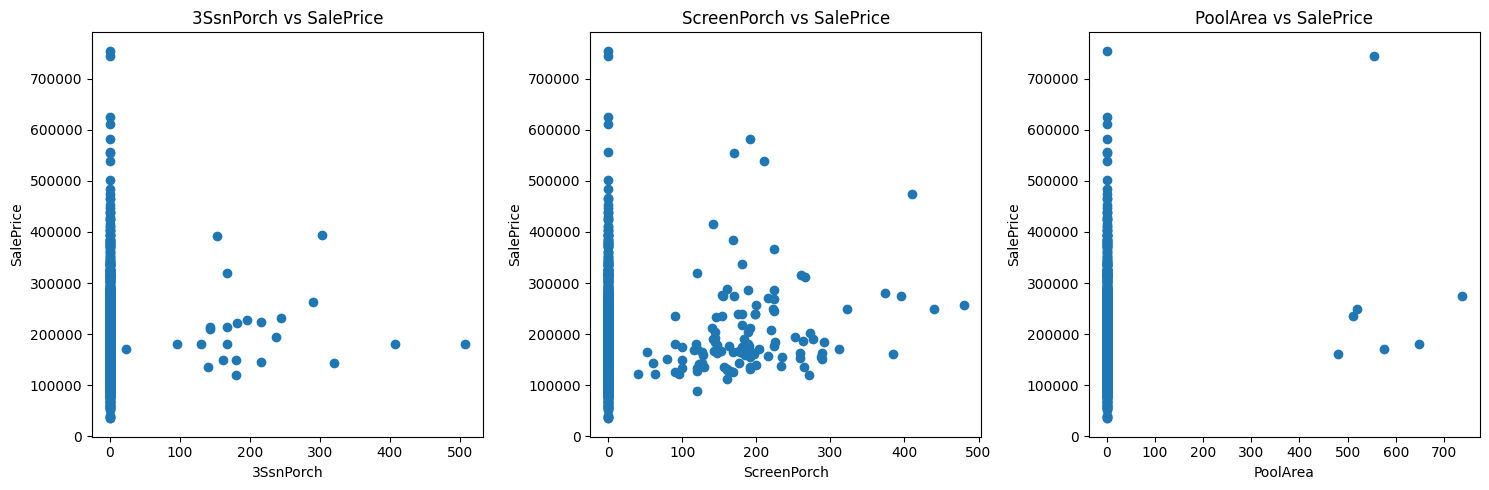

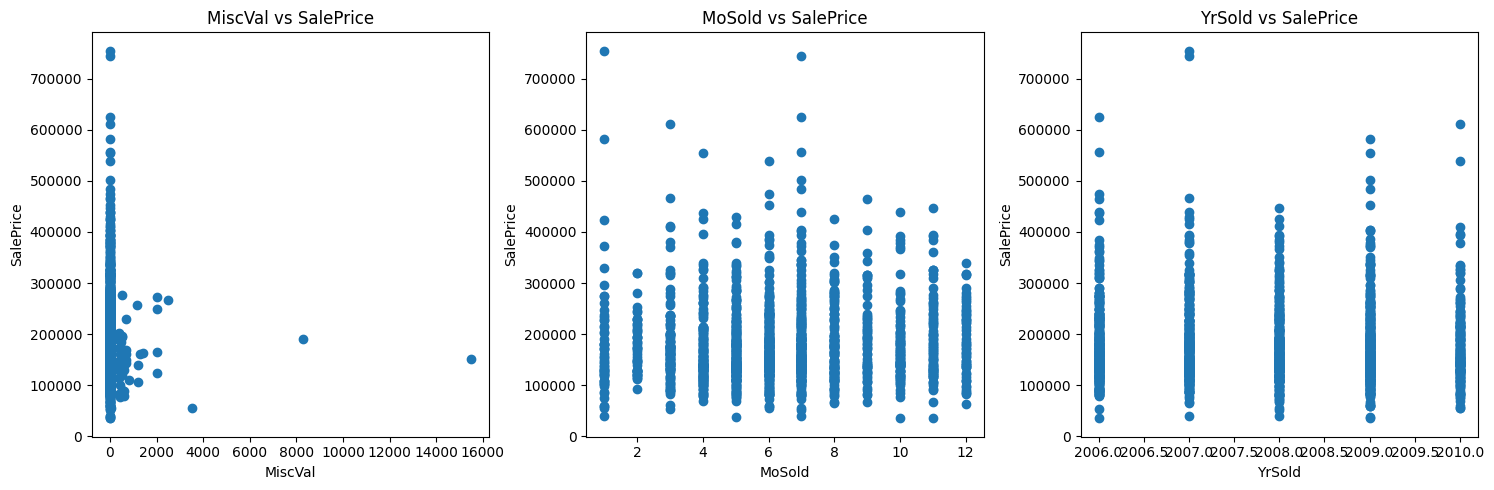

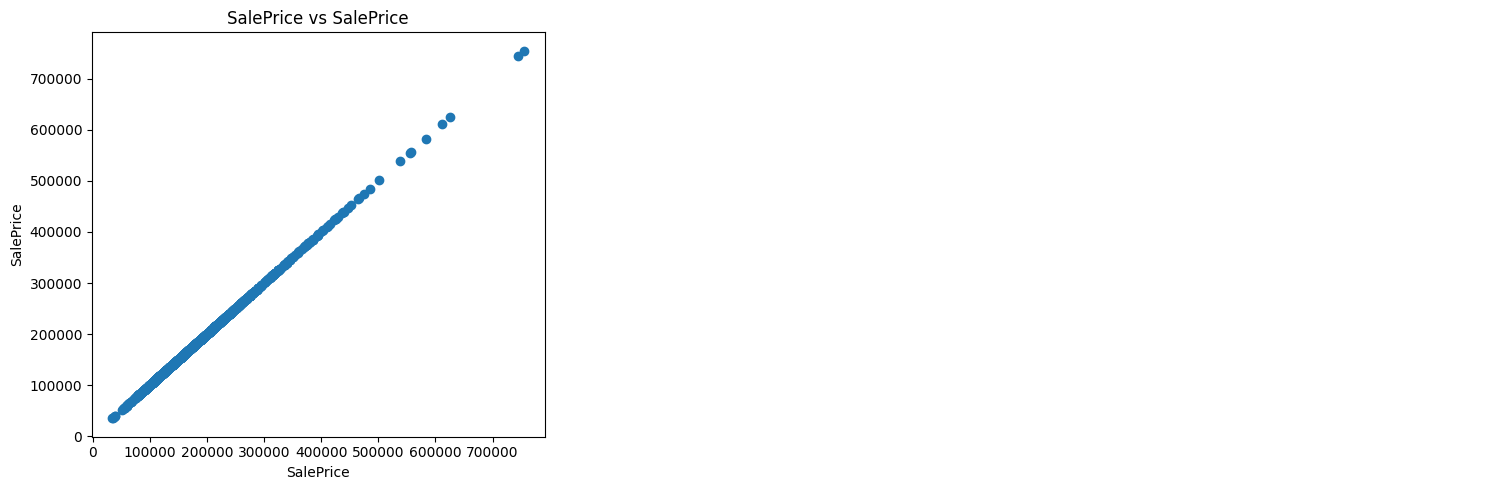

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


numerical_columns = train.select_dtypes(include=['number']).columns


plots_per_row = 3


num_plots = len(numerical_columns)
for i in range(0, num_plots, plots_per_row):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(15, 5))

    for j in range(plots_per_row):
        if i + j < num_plots:
            ax = axes[j]
            col = numerical_columns[i + j]
            ax.scatter(train[col], train['SalePrice'])
            ax.set_xlabel(col)
            ax.set_ylabel('SalePrice')
            ax.set_title(f'{col} vs SalePrice')
        else:
            axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [31]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

RandomForestRegressor(random_state=42)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_val_pred = model.predict(X_val)


mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)


print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 18107.82591324201
Root Mean Squared Error (RMSE): 29506.547238995543
R² Score: 0.886492920059738


In [36]:
threshold = 0.4 * train.shape[0]


train = train.loc[:, train.isnull().sum() <= threshold]
test = test.loc[:, test.isnull().sum() <= threshold]


print("Updated train shape:", train.shape)
print("Updated test shape:", test.shape)

Updated train shape: (1460, 37)
Updated test shape: (1459, 36)


In [37]:
numerical_columns = test.select_dtypes(include=['number']).columns
test[numerical_columns] = test[numerical_columns].apply(lambda col: col.fillna(col.median()))


print(test.isnull().sum())

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64


In [38]:
le=LabelEncoder()
for i in train.columns:
    if train[i].dtype=='object':
        train[i]=le.fit_transform(train[i])
for i in test.columns:
    if test[i].dtype=='object':
        test[i]=le.fit_transform(test[i])
train['SalePrice']=np.log1p(train['SalePrice'])
x=train.drop(['SalePrice'],axis=1)
y=train['SalePrice']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 42)

NameError: name 'LabelEncoder' is not defined